<a href="https://colab.research.google.com/github/martinjm81/pythonprojects/blob/main/martin_aplicaciones_var_parte1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt

data = pd.DataFrame({'var1': np.random.rand(100),'var2': np.random.rand(100),
    'var3': np.random.rand(100), 'var4': np.random.rand(100)
})

In [2]:
np.random.seed(0)
data = pd.DataFrame(np.random.randn(100, 4), columns=['var1', 'var2', 'var3', 'var4'])

model = VAR(data)
results1 = model.fit(1); results2 = model.fit(2); results3 = model.fit(3); results4 = model.fit(4)

results = {
    'Model': ['Model 1', 'Model 2', 'Model 3', 'Model 4'],
    'Lag': [1, 2, 3, 4],
    'AIC': [results1.aic, results2.aic, results3.aic, results4.aic],
    'BIC': [results1.bic, results2.bic, results3.bic, results4.bic]
}

results_df = pd.DataFrame(results)

print(results_df)

     Model  Lag       AIC       BIC
0  Model 1    1 -0.239363  0.284904
1  Model 2    2 -0.221573  0.728007
2  Model 3    3 -0.010247  1.370011
3  Model 4    4  0.102597  1.919010


In [3]:
model = VAR(data)
results = {}
for lag in range(1, 5):
    results[lag] = model.fit(lag)

results_summary = {'Lag': [],'AIC': [], 'BIC': [] }

for lag, res in results.items():
    results_summary['Lag'].append(lag)
    results_summary['AIC'].append(res.aic)
    results_summary['BIC'].append(res.bic)

results_df = pd.DataFrame(results_summary)

optimal_lag_aic = results_df.loc[results_df['AIC'].idxmin(), 'Lag']
optimal_lag_bic = results_df.loc[results_df['BIC'].idxmin(), 'Lag']

print("Resultados de Modelos VAR:")
print(results_df)
print("\nNúmero de Rezagos Óptimo Basado en AIC:", optimal_lag_aic)
print("Número de Rezagos Óptimo Basado en BIC:", optimal_lag_bic)


Resultados de Modelos VAR:
   Lag       AIC       BIC
0    1 -0.239363  0.284904
1    2 -0.221573  0.728007
2    3 -0.010247  1.370011
3    4  0.102597  1.919010

Número de Rezagos Óptimo Basado en AIC: 1
Número de Rezagos Óptimo Basado en BIC: 1


In [4]:
maxlags = [1, 2, 3, 4]
results = {}
for lag in maxlags:
    model = VAR(data)
    results[lag] = model.fit(maxlags=lag, ic='aic')  # Ajuste usando AIC

results_summary = {'Lag': [], 'AIC': [],'BIC': []}

for lag in maxlags:
    res = results[lag]
    results_summary['Lag'].append(lag)
    results_summary['AIC'].append(res.aic)
    results_summary['BIC'].append(res.bic)

results_df = pd.DataFrame(results_summary)

optimal_lag_aic = results_df.loc[results_df['AIC'].idxmin(), 'Lag']
optimal_lag_bic = results_df.loc[results_df['BIC'].idxmin(), 'Lag']

print("Resultados de Modelos VAR:")
print(results_df)
print("\nNúmero de Rezagos Óptimo Basado en AIC:", optimal_lag_aic)
print("Número de Rezagos Óptimo Basado en BIC:", optimal_lag_bic)


Resultados de Modelos VAR:
   Lag       AIC       BIC
0    1 -0.196566 -0.092360
1    2 -0.239363  0.284904
2    3 -0.239363  0.284904
3    4 -0.239363  0.284904

Número de Rezagos Óptimo Basado en AIC: 2
Número de Rezagos Óptimo Basado en BIC: 1


In [5]:
model = VAR(data)
results = model.fit(maxlags=5, ic='aic')

optimal_lag = results.k_ar
aic = results.aic
bic = results.bic
loglik = results.llf

results_df = pd.DataFrame({
    'Metric': ['AIC', 'BIC', 'Log-Likelihood', 'Optimal Lag'],
    'Value': [aic, bic, loglik, optimal_lag]
})

print("Resultados del Modelo VAR:")
print(results_df)

Resultados del Modelo VAR:
           Metric       Value
0             AIC   -0.239363
1             BIC    0.284904
2  Log-Likelihood -530.051215
3     Optimal Lag    1.000000


In [6]:
maxlags = 12
model = VAR(data)
results = model.fit(maxlags=maxlags, ic='aic')

optimal_lag = results.k_ar
aic = results.aic
bic = results.bic
loglik = results.llf

results_df = pd.DataFrame({
    'Metric': ['AIC', 'BIC', 'Log-Likelihood', 'Optimal Lag'],
    'Value': [aic, bic, loglik, optimal_lag]
})

print("Resultados del Modelo VAR:")
print(results_df)


Resultados del Modelo VAR:
           Metric       Value
0             AIC   -0.239363
1             BIC    0.284904
2  Log-Likelihood -530.051215
3     Optimal Lag    1.000000


In [7]:
max_lags_list = [1, 2, 3, 4, 5, 6]

results_summary = []

for maxlags in max_lags_list:
    model = VAR(data)
    results = model.fit(maxlags=maxlags, ic='aic')

    optimal_lag = results.k_ar
    aic = results.aic
    bic = results.bic
    loglik = results.llf

    results_summary.append({
        'Max Lags': maxlags,
        'Optimal Lag': optimal_lag,
        'AIC': aic,
        'BIC': bic,
        'Log-Likelihood': loglik
    })

results_df = pd.DataFrame(results_summary)

print("Resultados de Modelos VAR:")
print(results_df)

Resultados de Modelos VAR:
   Max Lags  Optimal Lag       AIC       BIC  Log-Likelihood
0         1            0 -0.196566 -0.092360     -553.747095
1         2            1 -0.239363  0.284904     -530.051215
2         3            1 -0.239363  0.284904     -530.051215
3         4            1 -0.239363  0.284904     -530.051215
4         5            1 -0.239363  0.284904     -530.051215
5         6            1 -0.239363  0.284904     -530.051215


In [17]:
print(data)

        var1      var2      var3      var4
0   1.764052  0.400157  0.978738  2.240893
1   1.867558 -0.977278  0.950088 -0.151357
2  -0.103219  0.410599  0.144044  1.454274
3   0.761038  0.121675  0.443863  0.333674
4   1.494079 -0.205158  0.313068 -0.854096
..       ...       ...       ...       ...
95 -1.698106  0.387280 -2.255564 -1.022507
96  0.038631 -1.656715 -0.985511 -1.471835
97  1.648135  0.164228  0.567290 -0.222675
98 -0.353432 -1.616474 -0.291837 -0.761492
99  0.857924  1.141102  1.466579  0.852552

[100 rows x 4 columns]


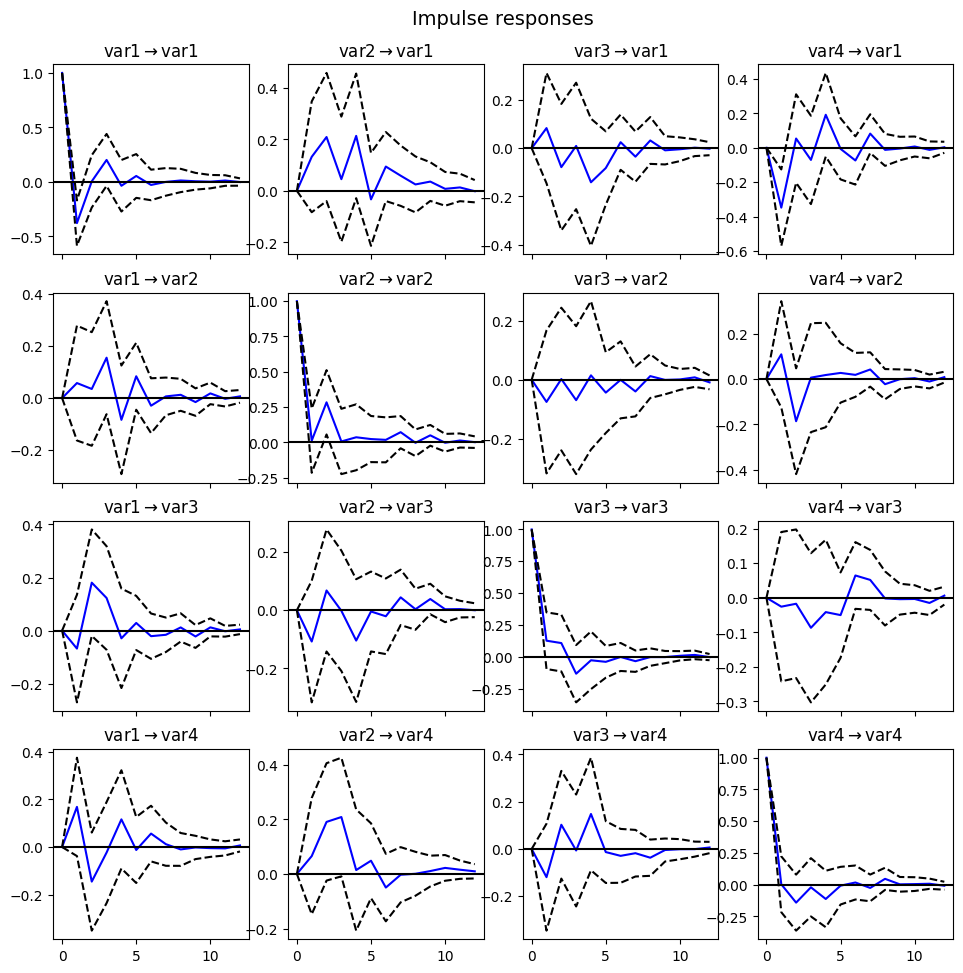

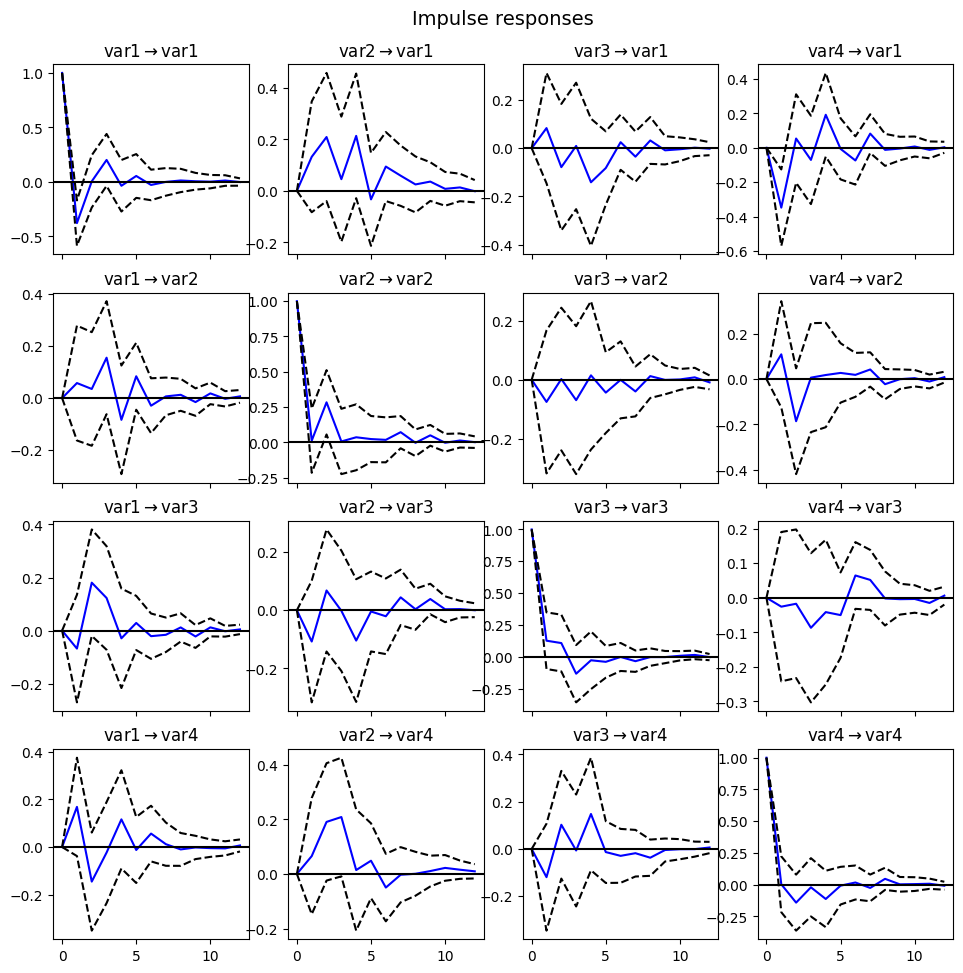

In [31]:
model = VAR(data)
results = model.fit(maxlags=4)
#print(results.summary())
irf = results.irf(12)
irf.plot()